In [1]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Some code to return a Pandas dataframe, given tabular text
def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)


In [3]:
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

high_var_list = ['K00058', 'K00059', 'K00297', 'K00302', 'K00315', 'K00371', 'K00371', 'K00549', 'K00626',
                 'K01465', 'K01649', 'K01652', 'K01714', 'K01784', 'K01952', 'K01990', 'K01992', 'K01997',
                 'K01998', 'K01999', 'K02274', 'K02276', 'K02575', 'K03320', 'K03573', 'K07090', 'K07090',
                 'K07497']
high_var_list = ['ko:' + knum for knum in high_var_list]


def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)


enzyme_list = []
for knum in high_var_list:
    result = REST.kegg_link('enzyme',knum).read()
    if result != '\n':
        enzyme_list.extend(list(to_df(result)[1].values))
enzyme_list = list(set(enzyme_list))

compound_list = []
for enzyme in enzyme_list:
    result = REST.kegg_link('compound', enzyme).read()
    if result != '\n':
        compound_list.extend(list(to_df(result)[1].values))
compound_list = list(set(compound_list))


mod_list = high_var_list + compound_list


met_pathway = KGML_parser.read(REST.kegg_get('ko01100', "kgml"))

high_var_mod_list = [e for e in met_pathway.entries.values() if \
                     len(set(e.name.split()).intersection(mod_list))]
other_mod_list = [e for e in met_pathway.entries.values() if \
                  not len(set(e.name.split()).intersection(mod_list)) \
                  and e.type != 'map']

# Change the widths of high variance entries elements
for e in high_var_mod_list:
    for g in e.graphics:
        g.width = 10

for e in other_mod_list:
    for g in e.graphics:
        g.width = .4
        g.fgcolor = '#CCCCCC'

canvas = KGMLCanvas(met_pathway, import_imagemap=False)
canvas.draw("high_var_mod_widths.pdf")

In [4]:
X = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
               [3.2, 2.4, 2.4, 0.1, 5.5],
               [10., 8.2, 4.3, 2.6, 0.9]
             ])

In [5]:
covar = np.cov(X)
covar

array([[ 0.115 ,  0.0575, -1.2325],
       [ 0.0575,  3.757 , -0.8775],
       [-1.2325, -0.8775, 14.525 ]])

In [6]:
corr = np.corrcoef(X)
corr

array([[ 1.        ,  0.0874779 , -0.95363007],
       [ 0.0874779 ,  1.        , -0.11878687],
       [-0.95363007, -0.11878687,  1.        ]])

In [7]:
diag = np.diag(np.sqrt(1/np.diag(covar)))
diag

array([[2.94883912, 0.        , 0.        ],
       [0.        , 0.51591648, 0.        ],
       [0.        , 0.        , 0.26238677]])

In [8]:
diag @ covar @ diag

array([[ 1.        ,  0.0874779 , -0.95363007],
       [ 0.0874779 ,  1.        , -0.11878687],
       [-0.95363007, -0.11878687,  1.        ]])

In [9]:
inv_covar = np.linalg.pinv(covar)
inv_covar

array([[9.67102568e+01, 4.42798755e-01, 8.23297400e+00],
       [4.42798755e-01, 2.72006715e-01, 5.40058766e-02],
       [8.23297400e+00, 5.40058766e-02, 7.70707788e-01]])

In [10]:
inv_diag = np.diag(np.sqrt(1/np.diag(inv_covar)))
inv_diag

array([[0.1016866 , 0.        , 0.        ],
       [0.        , 1.9173888 , 0.        ],
       [0.        , 0.        , 1.13908236]])

In [11]:
-1 * inv_diag @ inv_covar @ inv_diag

array([[-1.        , -0.08633369, -0.95362055],
       [-0.08633369, -1.        , -0.11795228],
       [-0.95362055, -0.11795228, -1.        ]])

In [12]:
inv_corr = np.linalg.pinv(corr)
inv_corr

array([[11.12167953,  0.29105557, 10.64054162],
       [ 0.29105557,  1.02192923,  0.39895112],
       [10.64054162,  0.39895112, 11.19453062]])

In [13]:
inv_corr_diag = np.diag(np.sqrt(1/np.diag(inv_corr)))

In [14]:
-1 * inv_corr_diag @ inv_corr @ inv_corr_diag

array([[-1.        , -0.08633369, -0.95362055],
       [-0.08633369, -1.        , -0.11795228],
       [-0.95362055, -0.11795228, -1.        ]])

In [15]:
# using the correlation matrix
corr = np.corrcoef(X)
inv_corr = np.linalg.pinv(corr)
inv_corr_diag = np.diag(np.sqrt(1/np.diag(inv_corr)))
partial_corr1 = -1 * inv_corr_diag @ inv_corr @ inv_corr_diag
partial_corr1

array([[-1.        , -0.08633369, -0.95362055],
       [-0.08633369, -1.        , -0.11795228],
       [-0.95362055, -0.11795228, -1.        ]])

In [16]:
# using the covariance matrix
covar = np.cov(X)
inv_covar = np.linalg.pinv(covar)
inv_covar_diag = np.diag(np.sqrt(1/np.diag(inv_covar)))
partial_corr2 = -1 * inv_covar_diag @ inv_covar @ inv_covar_diag
partial_corr2

array([[-1.        , -0.08633369, -0.95362055],
       [-0.08633369, -1.        , -0.11795228],
       [-0.95362055, -0.11795228, -1.        ]])

In [17]:
inv_covar_diag

array([[0.1016866 , 0.        , 0.        ],
       [0.        , 1.9173888 , 0.        ],
       [0.        , 0.        , 1.13908236]])

In [2]:
metabolic_cov_file = '/Users/bryna/Downloads/MetabolicKOcov.txt'
metabolic_cov = pd.read_csv(metabolic_cov_file, delimiter='\t', index_col='KO')

In [3]:
metabolic_cov_array = metabolic_cov.to_numpy()
metabolic_cov_array.shape

(4419, 12)

In [20]:
nvar, nsample = metabolic_cov_array.shape
nsample

12

In [21]:
var_means = np.mean(metabolic_cov_array, axis=1)
var_means.shape

(4419,)

In [22]:
centered_metabolic_cov_array = metabolic_cov_array - np.repeat(var_means[:, np.newaxis], nsample, axis=1)
emp_covar = (1/(nsample-1)) * (centered_metabolic_cov_array @ centered_metabolic_cov_array.T)

In [23]:
np_covar = np.cov(metabolic_cov_array)

In [24]:
np.max(np.abs(np_covar - emp_covar))

0.0

In [25]:
wijk = np.einsum('ik,kj->ijk',centered_metabolic_cov_array,centered_metabolic_cov_array.T)

In [26]:
wijk.shape

(4419, 4419, 12)

In [27]:
wij_bar = (1/nsample) * np.einsum('ijk->ij', wijk)

In [28]:
wij_bar.shape

(4419, 4419)

In [29]:
emp_covar2 = (nsample/(nsample-1)) * wij_bar
np.max(np.abs(np_covar - emp_covar2))

6.617444900424222e-24

In [30]:
np.tile(wij_bar[:, :, np.newaxis], (1, 1, nsample)).shape

(4419, 4419, 12)

In [31]:
var_sij = (nsample/(nsample-1)**3) * np.einsum('ijk->ij',
                                               (wijk - np.tile(wij_bar[:, :, np.newaxis], (1, 1, nsample)))**2)

In [32]:
var_sij.shape

(4419, 4419)

In [33]:
numpy_var = np.var(metabolic_cov_array, axis=1)
numpy_var2 = np.diag(np_covar)
print(np.max(np.abs(numpy_var - np.diag(emp_covar))))
print(np.max(np.abs(numpy_var - np.diag(numpy_var2))))

3.3276096454471985e-09
3.660370609991915e-08


In [34]:
standardized_metabolic_cov_array = (centered_metabolic_cov_array
                                    * np.repeat((np.diag(emp_covar)[:, np.newaxis])**(-1/2), nsample, axis=1))

In [35]:
standardized_metabolic_cov_array.shape

(4419, 12)

In [36]:
emp_corr = (1/(nsample-1)) * (standardized_metabolic_cov_array @ standardized_metabolic_cov_array.T)
np_corr2 = np.diag((np.diag(np_covar))**(-1/2)) @ np_covar @ np.diag((np.diag(np_covar))**(-1/2))

In [37]:
np_corr = np.corrcoef(metabolic_cov_array)

In [38]:
np.max(np.abs(np_corr - emp_corr))

1.6653345369377348e-15

In [39]:
np.max(np.abs(np_corr - np_corr2))

1.7763568394002505e-15

In [40]:
corr_wijk = np.einsum('ik,kj->ijk',standardized_metabolic_cov_array,standardized_metabolic_cov_array.T)
corr_wij_bar = (1/nsample) * np.einsum('ijk->ij', corr_wijk)
emp_corr2 = (nsample/(nsample-1)) * corr_wij_bar
var_rij = (nsample/(nsample-1)**3) * np.einsum('ijk->ij',
                                               (corr_wijk - np.tile(corr_wij_bar[:, :, np.newaxis], (1, 1, nsample)))**2)

In [41]:
np.max(np.abs(np_corr - emp_corr2))

1.5543122344752192e-15

In [42]:
var_rij.shape

(4419, 4419)

In [43]:
lambda_star = (np.sum(var_rij) - np.trace(var_rij)) / (np.sum(emp_corr2**2) - np.trace(emp_corr2**2))

In [44]:
lambda_star

0.4848440015111615

In [45]:
corr_star = emp_corr2 * (1-lambda_star)
corr_star[np.diag_indices(nvar)] = 1
corr_star

array([[ 1.        , -0.23530361,  0.47908208, ..., -0.31812953,
        -0.07535868, -0.20188529],
       [-0.23530361,  1.        , -0.17046835, ...,  0.29099516,
         0.14167065,  0.14410216],
       [ 0.47908208, -0.17046835,  1.        , ..., -0.32629885,
         0.08999725, -0.17391739],
       ...,
       [-0.31812953,  0.29099516, -0.32629885, ...,  1.        ,
        -0.08738451,  0.12270137],
       [-0.07535868,  0.14167065,  0.08999725, ..., -0.08738451,
         1.        ,  0.08807916],
       [-0.20188529,  0.14410216, -0.17391739, ...,  0.12270137,
         0.08807916,  1.        ]])

In [46]:
covar_star = np.diag(np.diag(emp_covar2)**(1/2)) @ corr_star @ np.diag(np.diag(emp_covar2)**(1/2))
covar_star[np.diag_indices(nvar)] = np.diag(emp_covar2)
covar_star

array([[ 4.42124716e-10, -8.00918779e-12,  2.57913471e-10, ...,
        -1.21282041e-12, -6.85595650e-13, -1.72636178e-11],
       [-8.00918779e-12,  2.62044449e-12, -7.06517541e-12, ...,
         8.54069774e-14,  9.92269695e-14,  9.48664632e-13],
       [ 2.57913471e-10, -7.06517541e-12,  6.55516174e-10, ...,
        -1.51470254e-12,  9.96972805e-13, -1.81087917e-11],
       ...,
       [-1.21282041e-12,  8.54069774e-14, -1.51470254e-12, ...,
         3.28730665e-14, -6.85514985e-15,  9.04740975e-14],
       [-6.85595650e-13,  9.92269695e-14,  9.96972805e-13, ...,
        -6.85514985e-15,  1.87208149e-13,  1.54985226e-13],
       [-1.72636178e-11,  9.48664632e-13, -1.81087917e-11, ...,
         9.04740975e-14,  1.54985226e-13,  1.65390093e-11]])

In [47]:
emp_covar2 - covar_star

array([[ 0.00000000e+00, -7.53792379e-12,  2.42737733e-10, ...,
        -1.14145754e-12, -6.45254912e-13, -1.62478192e-11],
       [-7.53792379e-12,  0.00000000e+00, -6.64945750e-12, ...,
         8.03815947e-14,  9.33884126e-14,  8.92844804e-13],
       [ 2.42737733e-10, -6.64945750e-12,  0.00000000e+00, ...,
        -1.42557680e-12,  9.38310503e-13, -1.70432627e-11],
       ...,
       [-1.14145754e-12,  8.03815947e-14, -1.42557680e-12, ...,
         0.00000000e+00, -6.45178993e-15,  8.51505633e-14],
       [-6.45254912e-13,  9.33884126e-14,  9.38310503e-13, ...,
        -6.45178993e-15,  0.00000000e+00,  1.45865830e-13],
       [-1.62478192e-11,  8.92844804e-13, -1.70432627e-11, ...,
         8.51505633e-14,  1.45865830e-13,  0.00000000e+00]])

In [48]:
inv_covar_star = np.linalg.inv(covar_star)

In [49]:
pcorr_star = (-1 * np.diag(np.diag(inv_covar_star)**(-1/2))
              @ inv_covar_star @ np.diag(np.diag(inv_covar_star)**(-1/2)))

In [50]:
pcorr_star

array([[-1.00000000e+00, -3.31829246e-04,  1.23300835e-03, ...,
        -3.56124347e-04, -8.91786899e-05, -3.06971136e-04],
       [-3.31829246e-04, -1.00000000e+00, -3.28030791e-04, ...,
         8.18755615e-04, -1.88169692e-04, -2.33363096e-06],
       [ 1.23300835e-03, -3.28030791e-04, -1.00000000e+00, ...,
        -3.94506087e-04,  3.51516330e-04, -2.05970539e-04],
       ...,
       [-3.56124347e-04,  8.18755615e-04, -3.94506087e-04, ...,
        -1.00000000e+00, -5.67217675e-04,  1.76525119e-04],
       [-8.91786899e-05, -1.88169692e-04,  3.51516330e-04, ...,
        -5.67217675e-04, -1.00000000e+00,  3.26186025e-04],
       [-3.06971136e-04, -2.33363096e-06, -2.05970539e-04, ...,
         1.76525119e-04,  3.26186025e-04, -1.00000000e+00]])

In [51]:
print(np.min(pcorr_star), np.max(pcorr_star))

-1.0000000000000002 0.01343228406197681


In [52]:
pcorr_star.flatten().shape

(19527561,)

In [53]:
off_diag_inds = np.where(~np.eye(pcorr_star.shape[0],dtype=bool))

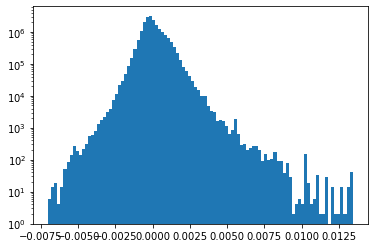

In [54]:
plt.hist(pcorr_star[off_diag_inds], bins=100)
plt.yscale('log')

In [10]:
def shrinkage_partial_correlation(data_array):
    """
    Calculate the partial correlation using the shrinkage method.
    
    Works well in the case of more variables than samples (p>n)
    
    Based on Schafer and Strimmer, 2005
    doi:10.2202/1544-6115.1175
    
    Parameters
    ----------
    data_array : np.array of float
        Input data, with shape (nvariables, nsamples)
    
    Returns
    -------
    np.array of float
        Partial correlation matrix
    
    """
    
    nvariables, nsamples = data_array.shape
    
    variances = np.var(data_array, axis=1)
    means = np.mean(data_array, axis=1)
    centered_array = data_array - np.repeat(means[:, np.newaxis], nsamples, axis=1)
    standardized_array = (centered_array
                          * np.repeat(variances[:, np.newaxis]**(-1/2), nsamples, axis=1))

    corr_wijk = np.einsum('ik,kj->ijk',standardized_array,standardized_array.T)
    corr_wij_bar = (1/nsamples) * np.einsum('ijk->ij', corr_wijk)
    rij = (nsamples/(nsamples-1)) * corr_wij_bar
    var_rij = ((nsamples/(nsamples-1)**3)
               * np.einsum('ijk->ij', (corr_wijk - np.tile(corr_wij_bar[:, :, np.newaxis], (1, 1, nsamples)))**2))

    # sum off diagonal components = sum of all minus sum of diagonal components, sum of diagonal is trace
    lambda_star = (np.sum(var_rij) - np.trace(var_rij)) / (np.sum(rij**2) - np.trace(rij**2))
    
    if lambda_star > 1:
        lambda_star = 1
    elif lambda_star < 0:
        lambda_star = 0
    
    diag_inds = np.diag_indices(nvariables)
    corr_star = rij * (1-lambda_star)
    corr_star[diag_inds] = 1
    
    covar_star = np.diag(variances**(1/2)) @ corr_star @ np.diag(variances**(1/2))
    covar_star[diag_inds] = variances
    
    inv_covar_star = np.linalg.inv(covar_star)
    
    pcorr_star = (-1 * np.diag(np.diag(inv_covar_star)**(-1/2))
                  @ inv_covar_star @ np.diag(np.diag(inv_covar_star)**(-1/2)))

    return pcorr_star

In [11]:
pcorr_star_method = shrinkage_partial_correlation(metabolic_cov_array)


In [12]:
pcorr_star_method

array([[-1.00000000e+00, -3.31906267e-04,  1.23353607e-03, ...,
        -3.56171934e-04, -8.91850822e-05, -3.06996731e-04],
       [-3.31906267e-04, -1.00000000e+00, -3.28152598e-04, ...,
         8.19100253e-04, -1.88426787e-04, -2.49802926e-06],
       [ 1.23353607e-03, -3.28152598e-04, -1.00000000e+00, ...,
        -3.94494331e-04,  3.51525055e-04, -2.05874671e-04],
       ...,
       [-3.56171934e-04,  8.19100253e-04, -3.94494331e-04, ...,
        -1.00000000e+00, -5.67446179e-04,  1.76581733e-04],
       [-8.91850822e-05, -1.88426787e-04,  3.51525055e-04, ...,
        -5.67446179e-04, -1.00000000e+00,  3.26401346e-04],
       [-3.06996731e-04, -2.49802926e-06, -2.05874671e-04, ...,
         1.76581733e-04,  3.26401346e-04, -1.00000000e+00]])

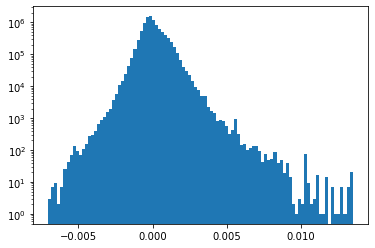

In [49]:
plt.hist(pcorr_star_method[np.triu_indices(pcorr_star_method.shape[0], k=1)], bins=100)
plt.yscale('log')

In [36]:
first_ind, second_ind = np.where(pcorr_star_method > 0.0133)

In [37]:
pcorr_star_method[first_ind[0], second_ind[0]]

0.013467944084678524

In [28]:
ko_names = metabolic_cov.index.to_numpy()

In [29]:
ko_names

array(['K00001', 'K00002', 'K00003', ..., 'K22911', 'K22912', 'K22913'],
      dtype=object)

In [77]:
ko_names = metabolic_cov.index.to_numpy()
first_ind, second_ind = np.where(np.triu(pcorr_star_method, k=1) > 0.0133)

ko_pairs = list(zip(ko_names[first_ind], ko_names[second_ind]))
ko_pairs

[('K16132', 'K17748'),
 ('K16132', 'K18775'),
 ('K16132', 'K20159'),
 ('K16132', 'K21188'),
 ('K16132', 'K21647'),
 ('K16132', 'K21840'),
 ('K17748', 'K18775'),
 ('K17748', 'K20159'),
 ('K17748', 'K21188'),
 ('K17748', 'K21647'),
 ('K17748', 'K21840'),
 ('K18775', 'K20159'),
 ('K18775', 'K21188'),
 ('K18775', 'K21647'),
 ('K18775', 'K21840'),
 ('K20159', 'K21188'),
 ('K20159', 'K21647'),
 ('K20159', 'K21840'),
 ('K21188', 'K21647'),
 ('K21188', 'K21840'),
 ('K21647', 'K21840')]

In [78]:
len(ko_pairs)

21

In [85]:
high_corr_kos = set(ko_names[first_ind].tolist() + ko_names[second_ind].tolist())
print(len(high_corr_kos))
high_corr_kos

7


{'K16132', 'K17748', 'K18775', 'K20159', 'K21188', 'K21647', 'K21840'}

In [80]:
ko_names = metabolic_cov.index.to_numpy()
first_ind_low, second_ind_low = np.where(np.triu(pcorr_star_method, k=1) < -0.0065)

ko_pairs = list(zip(ko_names[first_ind_low], ko_names[second_ind_low]))
print(len(ko_pairs))
ko_pairs

19


[('K01860', 'K22251'),
 ('K14418', 'K22251'),
 ('K16132', 'K16414'),
 ('K16132', 'K22251'),
 ('K16414', 'K17748'),
 ('K16414', 'K18775'),
 ('K16414', 'K20159'),
 ('K16414', 'K21188'),
 ('K16414', 'K21647'),
 ('K16414', 'K21840'),
 ('K16414', 'K22480'),
 ('K17748', 'K22251'),
 ('K18775', 'K22251'),
 ('K19188', 'K22251'),
 ('K20159', 'K22251'),
 ('K21188', 'K22251'),
 ('K21647', 'K22251'),
 ('K21840', 'K22251'),
 ('K22251', 'K22480')]

In [86]:
low_corr_kos = set(ko_names[first_ind_low].tolist() + ko_names[second_ind_low].tolist())
print(len(low_corr_kos))
low_corr_kos

13


{'K01860',
 'K14418',
 'K16132',
 'K16414',
 'K17748',
 'K18775',
 'K19188',
 'K20159',
 'K21188',
 'K21647',
 'K21840',
 'K22251',
 'K22480'}

In [87]:
high_corr_kos|low_corr_kos

{'K01860',
 'K14418',
 'K16132',
 'K16414',
 'K17748',
 'K18775',
 'K19188',
 'K20159',
 'K21188',
 'K21647',
 'K21840',
 'K22251',
 'K22480'}

In [92]:
temp = np.zeros((5,5))
temp

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [103]:
temp[0:3, 0:3]=1
temp[3:5, 3:5]=1

In [104]:
temp

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [105]:
temp2 = np.zeros((5,5))
temp2[0:2, 0:2]=1
temp2[2:5, 2:5]=1
temp2

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 1.]])

In [106]:
temp*temp2

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [113]:
temp+temp2

array([[2., 2., 1., 0., 0.],
       [2., 2., 1., 0., 0.],
       [1., 1., 2., 1., 1.],
       [0., 0., 1., 2., 2.],
       [0., 0., 1., 2., 2.]])

In [118]:
(np.sum(temp*temp2)-5.)/2

2.0

In [126]:
temp = np.zeros((5,5))
temp[0:3, 0:3]=1
temp[3:5, 3:5]=1
temp2 = np.zeros((5,5))
temp2[0:2, 0:2]=1
temp2[2:5, 2:5]=1

print('first array')
print(temp)
print('second array')
print(temp2)
print('product')
print(temp*temp2)
print('sum')
print(temp+temp2)
print('similarity measure')
print(np.sum(np.triu(temp*temp2, k=1)))

first array
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]
second array
[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]]
product
[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]
sum
[[2. 2. 1. 0. 0.]
 [2. 2. 1. 0. 0.]
 [1. 1. 2. 1. 1.]
 [0. 0. 1. 2. 2.]
 [0. 0. 1. 2. 2.]]
similarity measure
2.0
